In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

#Dimension Reduction
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("./Data/letter-recognition.data")
data.shape
data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# Data Preprocessing
## Data Pairs Extraction
Pair 1: H and K
Pair 2: M and Y
Pair 3: A and B

In [3]:
data['T'].unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [4]:
p1_data = data[(data['T'] == 'H') | (data['T'] == 'K')]
p1_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
20,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
27,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
63,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
65,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
68,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19920,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
19930,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9
19936,H,3,8,5,6,4,8,8,7,7,7,5,7,3,8,3,7
19956,H,5,7,8,5,5,9,7,3,6,10,4,7,5,8,4,9


In [5]:
p2_data = data[(data['T'] == 'M') | (data['T'] == 'Y')]
p2_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
12,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
25,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7
33,M,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
49,Y,7,11,9,8,8,9,5,6,4,7,8,8,3,9,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19939,Y,6,9,5,5,2,5,9,3,3,10,9,5,3,10,3,4
19948,M,5,8,7,6,7,8,6,6,5,7,7,10,11,6,2,9
19978,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6
19981,Y,3,9,5,6,3,7,9,1,6,6,11,8,2,11,2,7


In [6]:
p3_data = data[(data['T'] == 'A') | (data['T'] == 'B')]
p3_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
32,B,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
77,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
117,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19950,A,6,10,7,6,3,12,0,4,1,11,4,12,4,4,3,11
19961,B,4,8,6,6,5,7,8,6,6,10,6,6,3,8,7,8
19965,A,2,3,3,1,1,6,2,2,1,5,2,8,1,6,1,7
19976,A,3,9,5,6,2,6,5,3,1,6,1,8,2,7,2,7


In [7]:
multi_data = data[(data['T'] == 'H') | (data['T'] == 'K')|(data['T'] == 'M') | (data['T'] == 'Y')|(data['T'] == 'A') | (data['T'] == 'B')]
multi_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
12,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
20,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19977,K,5,11,5,8,5,3,8,7,3,6,4,11,3,8,2,11
19978,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6
19981,Y,3,9,5,6,3,7,9,1,6,6,11,8,2,11,2,7
19984,M,5,6,8,4,5,9,6,2,4,9,5,7,8,6,2,8


## Data Splitting

In [8]:
p1_x = p1_data.drop(columns = 'T')
p1_y = p1_data['T']
p2_x = p2_data.drop(columns = 'T')
p2_y = p2_data['T']
p3_x = p3_data.drop(columns = 'T')
p3_y = p3_data['T']
multi_x = multi_data.drop(columns = 'T')
multi_y = multi_data['T']

In [9]:
p1_x_train, p1_x_test, p1_y_train, p1_y_test = train_test_split(p1_x, p1_y, test_size = 0.1, random_state = 13)
p2_x_train, p2_x_test, p2_y_train, p2_y_test = train_test_split(p2_x, p2_y, test_size = 0.1, random_state = 13)
p3_x_train, p3_x_test, p3_y_train, p3_y_test = train_test_split(p3_x, p3_y, test_size = 0.1, random_state = 13)
multi_x_train, multi_x_test, multi_y_train, multi_y_test = train_test_split(multi_x, multi_y, test_size = 0.1, random_state = 13)

In [10]:
print("Pair 1 Size: ", p1_x.shape, " Pair 1 Train Size: ", p1_x_train.shape, " Pair 1 Test Size: ", p1_x_test.shape )
print("Pair 2 Size: ", p2_x.shape, " Pair 2 Train Size: ", p2_x_train.shape, " Pair 2 Test Size: ", p2_x_test.shape )
print("Pair 3 Size: ", p3_x.shape, " Pair 3 Train Size: ", p3_x_train.shape, " Pair 3 Test Size: ", p3_x_test.shape )
print("Multi Data Size: ", multi_x.shape, " Multi Data Train Size: ", multi_x_train.shape, " Multi Data Test Size: ", multi_x_test.shape )

Pair 1 Size:  (1473, 16)  Pair 1 Train Size:  (1325, 16)  Pair 1 Test Size:  (148, 16)
Pair 2 Size:  (1578, 16)  Pair 2 Train Size:  (1420, 16)  Pair 2 Test Size:  (158, 16)
Pair 3 Size:  (1555, 16)  Pair 3 Train Size:  (1399, 16)  Pair 3 Test Size:  (156, 16)
Multi Data Size:  (4606, 16)  Multi Data Train Size:  (4145, 16)  Multi Data Test Size:  (461, 16)


# Model fitting

## Plot Function

In [11]:
def plot(title, models, x_train, y_train, x_test, y_test):
    mean_list = []
    name_list = []
    start_time = time.time()
    for name, model in models:
        kfold = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
        model.fit(x_train, y_train)
        predctions = model.predict(x_test)
        result = accuracy_score(y_test, predctions)
        cv_result = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
        mean_list.append(cv_result.mean())
        name_list.append(name)
    end_time = time.time()
    
    plt.plot(name_list, mean_list)
    plt.ylabel('Accuracy Score')
    plt.title(title)
    for i, j in zip(name_list, mean_list):
        plt.annotate(str(format(j, '.4f')), xy = (i, j))
    if(len(name_list) <= 15):
        plt.xticks(rotation = 60)
    else:
        plt.xticks(rotation = 'vertical')
    plt.rcParams['figure.figsize'] = [len(name_list), 5]
    
    plt.show()
    print('Mean Accuracy: ', round(statistics.mean(mean_list), 4))
    print('Best Accuracy: ', round(max(mean_list), 4))
    print('Running Time: ', round(end_time - start_time,4))
    print("--------------------------------------------------------------------------------------")

## K-Nearest Neighbors

In [12]:
n_neighbors = [3, 4, 5, 6, 7]
algorithms = ['brute', 'ball_tree', 'kd_tree']

def knn(models):
    for a in algorithms:
        for n in n_neighbors:
            models.append(('{} algorithm \n k = {}'.format(a, n), KNeighborsClassifier(algorithm = a , n_neighbors = n)))
    return models

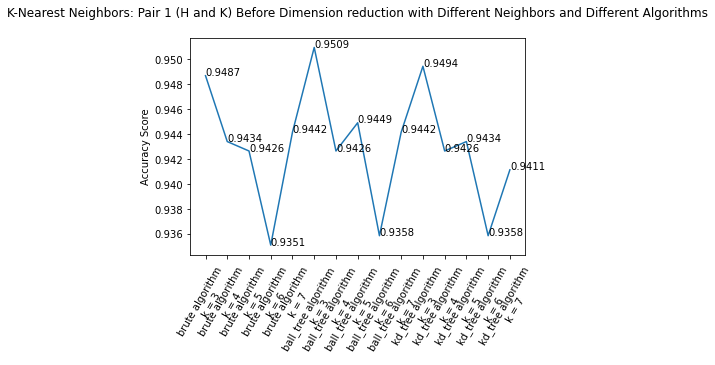

Mean Accuracy:  0.943
Best Accuracy:  0.9509
Running Time:  0.8646
--------------------------------------------------------------------------------------


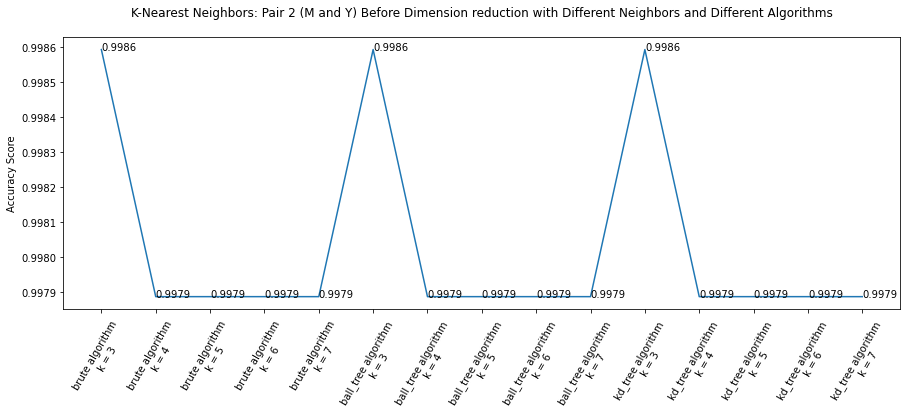

Mean Accuracy:  0.998
Best Accuracy:  0.9986
Running Time:  0.9804
--------------------------------------------------------------------------------------


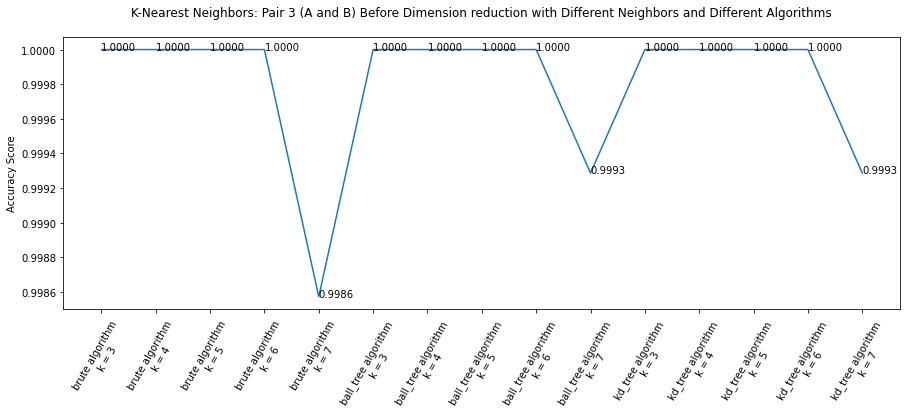

Mean Accuracy:  0.9998
Best Accuracy:  1.0
Running Time:  0.9035
--------------------------------------------------------------------------------------


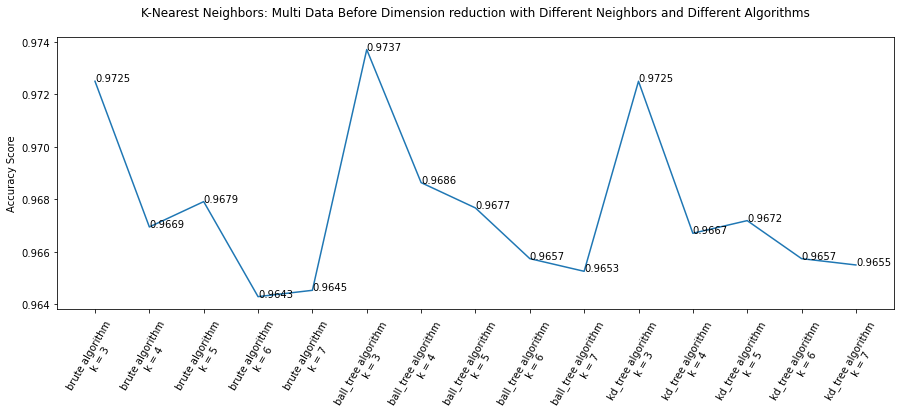

Mean Accuracy:  0.9677
Best Accuracy:  0.9737
Running Time:  3.6447
--------------------------------------------------------------------------------------


In [13]:
knn1_models = []
knn1_models = knn(knn1_models)
plot('K-Nearest Neighbors: Pair 1 (H and K) Before Dimension reduction with Different Neighbors and Different Algorithms\n', knn1_models, p1_x_train, p1_y_train, p1_x_test, p1_y_test)

plot('K-Nearest Neighbors: Pair 2 (M and Y) Before Dimension reduction with Different Neighbors and Different Algorithms\n', knn1_models, p2_x_train, p2_y_train, p2_x_test, p2_y_test)

plot('K-Nearest Neighbors: Pair 3 (A and B) Before Dimension reduction with Different Neighbors and Different Algorithms\n', knn1_models, p3_x_train, p3_y_train, p3_x_test, p3_y_test)

plot('K-Nearest Neighbors: Multi Data Before Dimension reduction with Different Neighbors and Different Algorithms\n', knn1_models, multi_x_train, multi_y_train, multi_x_test, multi_y_test)

## Decision Tree

In [14]:
max_depths = [4, 6, 8, 10, 12]
max_features = ['auto', 'sqrt', 'log2']

def decison_tree(models):
    for f in max_features:
        for d in max_depths:
            models.append(('Max Features: {} \n Max Depth: {}'.format(f, d), DecisionTreeClassifier(max_depth = d , max_features= f, random_state = 13)))
    return models        

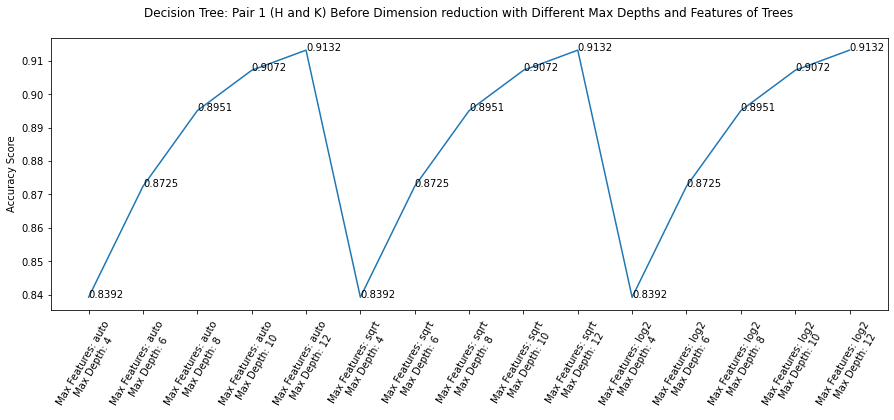

Mean Accuracy:  0.8854
Best Accuracy:  0.9132
Running Time:  0.2719
--------------------------------------------------------------------------------------


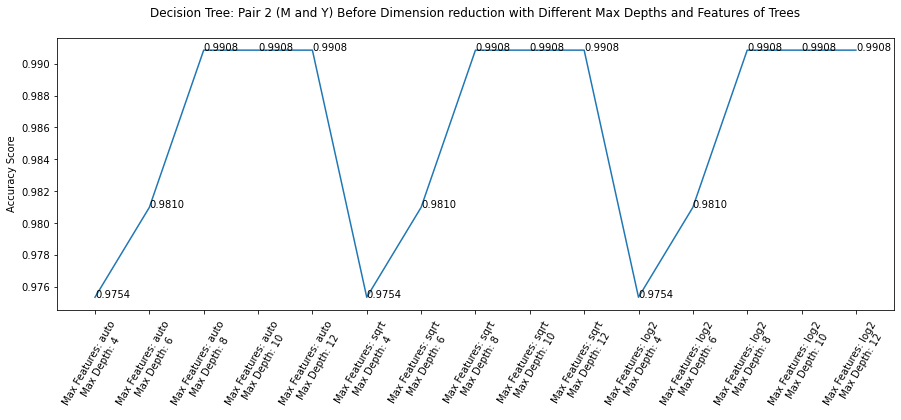

Mean Accuracy:  0.9858
Best Accuracy:  0.9908
Running Time:  0.2615
--------------------------------------------------------------------------------------


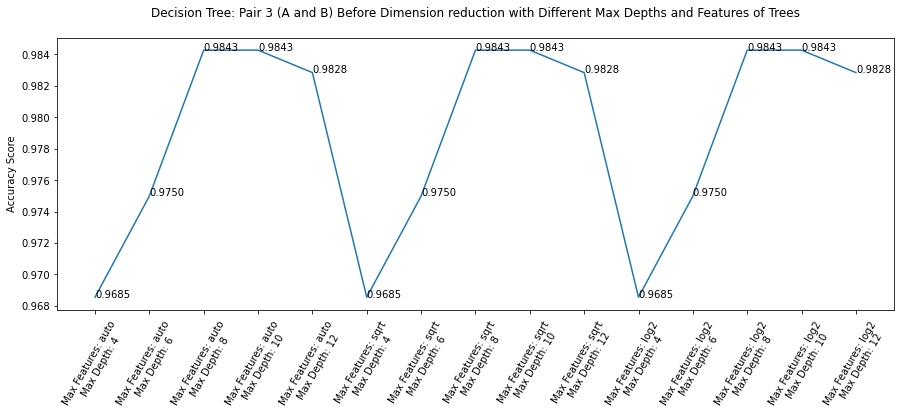

Mean Accuracy:  0.979
Best Accuracy:  0.9843
Running Time:  0.2766
--------------------------------------------------------------------------------------


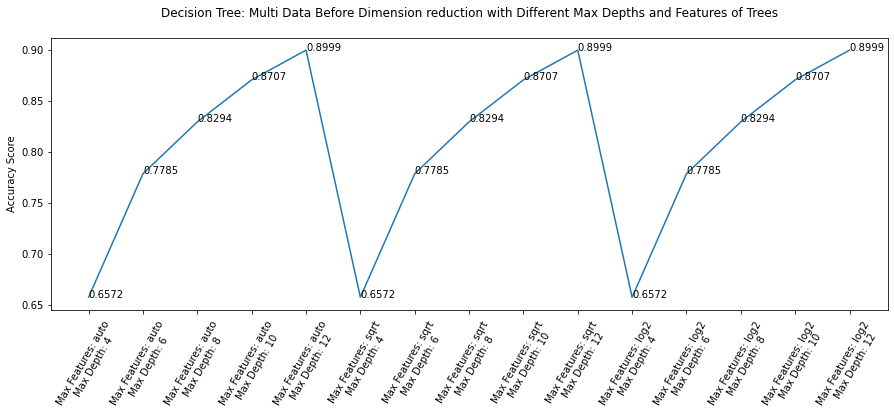

Mean Accuracy:  0.8071
Best Accuracy:  0.8999
Running Time:  0.5648
--------------------------------------------------------------------------------------


In [15]:
dt1_models = []
dt1_models = decison_tree(dt1_models)
plot('Decision Tree: Pair 1 (H and K) Before Dimension reduction with Different Max Depths and Features of Trees\n', dt1_models, p1_x_train, p1_y_train, p1_x_test, p1_y_test)

plot('Decision Tree: Pair 2 (M and Y) Before Dimension reduction with Different Max Depths and Features of Trees\n', dt1_models, p2_x_train, p2_y_train, p2_x_test, p2_y_test)

plot('Decision Tree: Pair 3 (A and B) Before Dimension reduction with Different Max Depths and Features of Trees\n', dt1_models, p3_x_train, p3_y_train, p3_x_test, p3_y_test)

plot('Decision Tree: Multi Data Before Dimension reduction with Different Max Depths and Features of Trees\n', dt1_models, multi_x_train, multi_y_train, multi_x_test, multi_y_test)

## Random Forest

In [16]:
max_depths = [4, 6, 8, 10, 12]
n_estimators = [20, 40, 60, 80, 100]

def random_forest(models):
    for d in max_depths:
        for e in n_estimators:
            models.append(('Number of Trees: {} \n Max Tree Depth: {}'.format(e, d), RandomForestClassifier(n_estimators = e, max_depth = d, random_state = 13)))
    return models

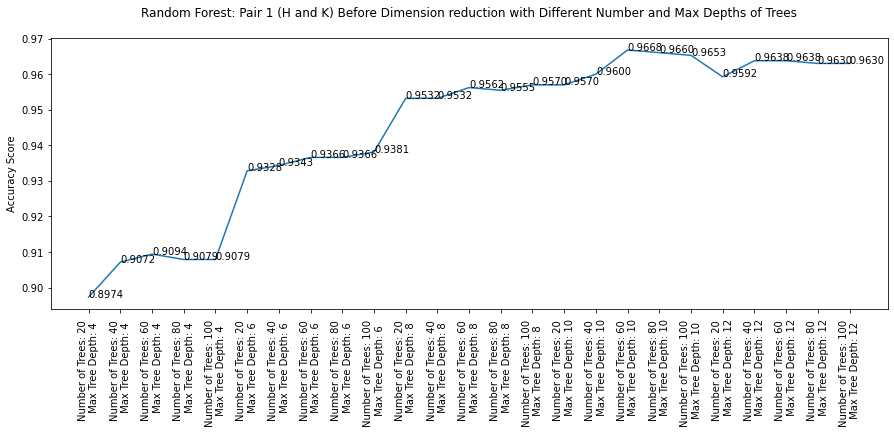

Mean Accuracy:  0.9445
Best Accuracy:  0.9668
Running Time:  9.8011
--------------------------------------------------------------------------------------


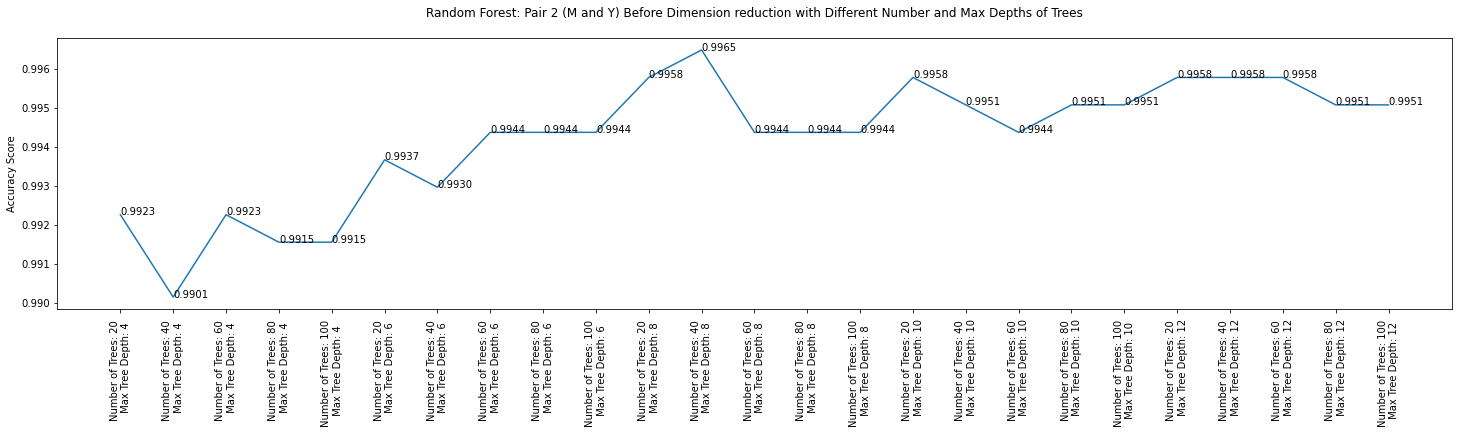

Mean Accuracy:  0.9942
Best Accuracy:  0.9965
Running Time:  9.0003
--------------------------------------------------------------------------------------


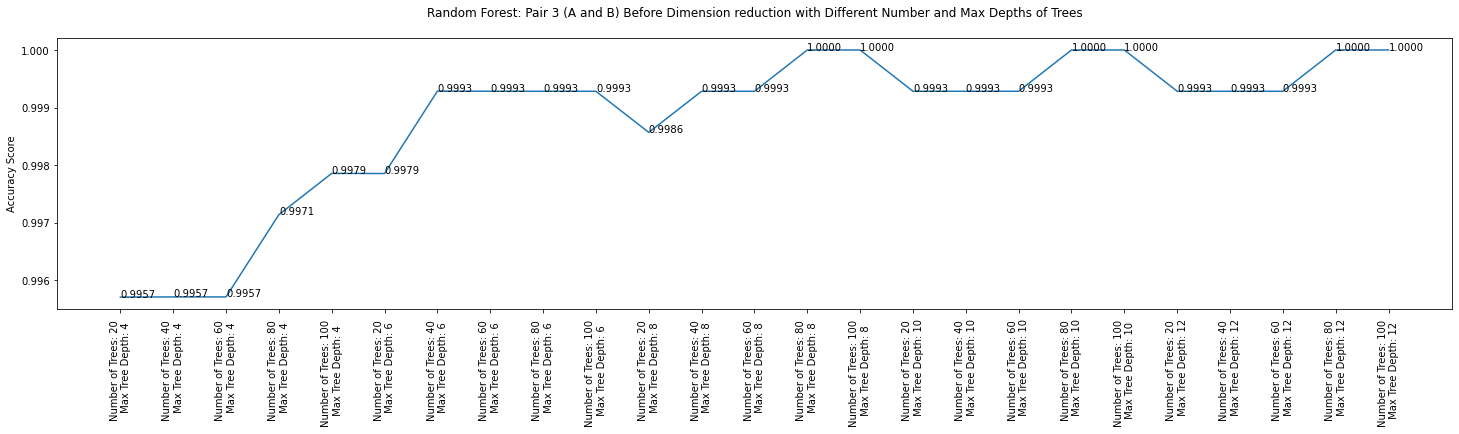

Mean Accuracy:  0.9988
Best Accuracy:  1.0
Running Time:  8.82
--------------------------------------------------------------------------------------


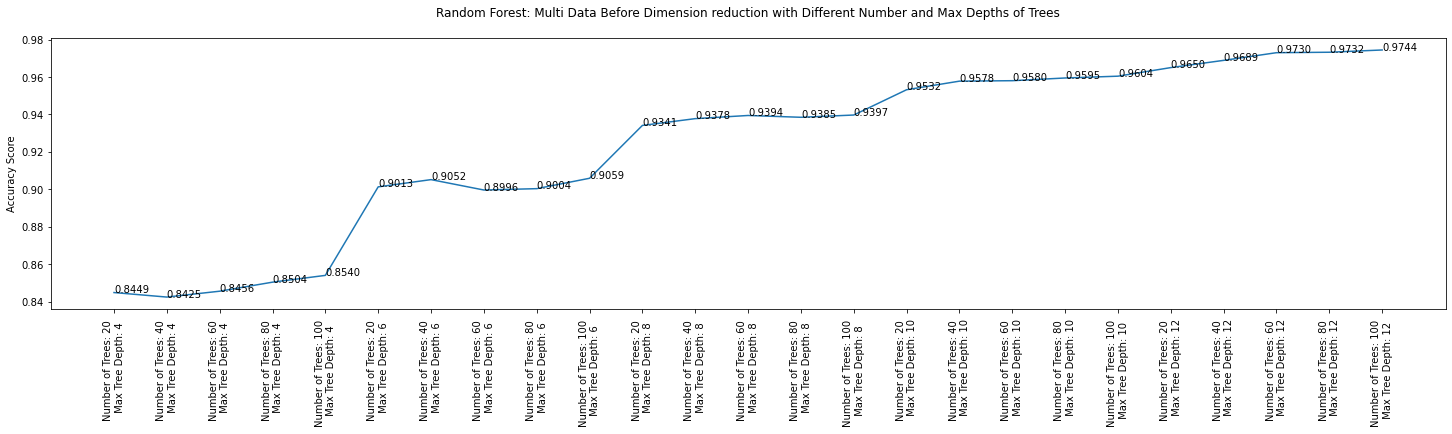

Mean Accuracy:  0.9233
Best Accuracy:  0.9744
Running Time:  19.1403
--------------------------------------------------------------------------------------


In [17]:
rf1_models = []
rf1_models = random_forest(rf1_models)
plot('Random Forest: Pair 1 (H and K) Before Dimension reduction with Different Number and Max Depths of Trees\n', rf1_models, p1_x_train, p1_y_train, p1_x_test, p1_y_test)

plot('Random Forest: Pair 2 (M and Y) Before Dimension reduction with Different Number and Max Depths of Trees\n', rf1_models, p2_x_train, p2_y_train, p2_x_test, p2_y_test)

plot('Random Forest: Pair 3 (A and B) Before Dimension reduction with Different Number and Max Depths of Trees\n', rf1_models, p3_x_train, p3_y_train, p3_x_test, p3_y_test)

plot('Random Forest: Multi Data Before Dimension reduction with Different Number and Max Depths of Trees\n', rf1_models, multi_x_train, multi_y_train, multi_x_test, multi_y_test)

## SVM

In [18]:
Cs = [0.4, 0.6, 0.8, 1.0, 1.2]
kernels = ['linear', 'poly', 'rbf']

def svm(models):
    for k in kernels:
        for c in Cs:
            models.append(('Kernel: {} \n Regularization Parameter: {}'.format(k, c), SVC( C = c, kernel = k, random_state = 13)))
    return models

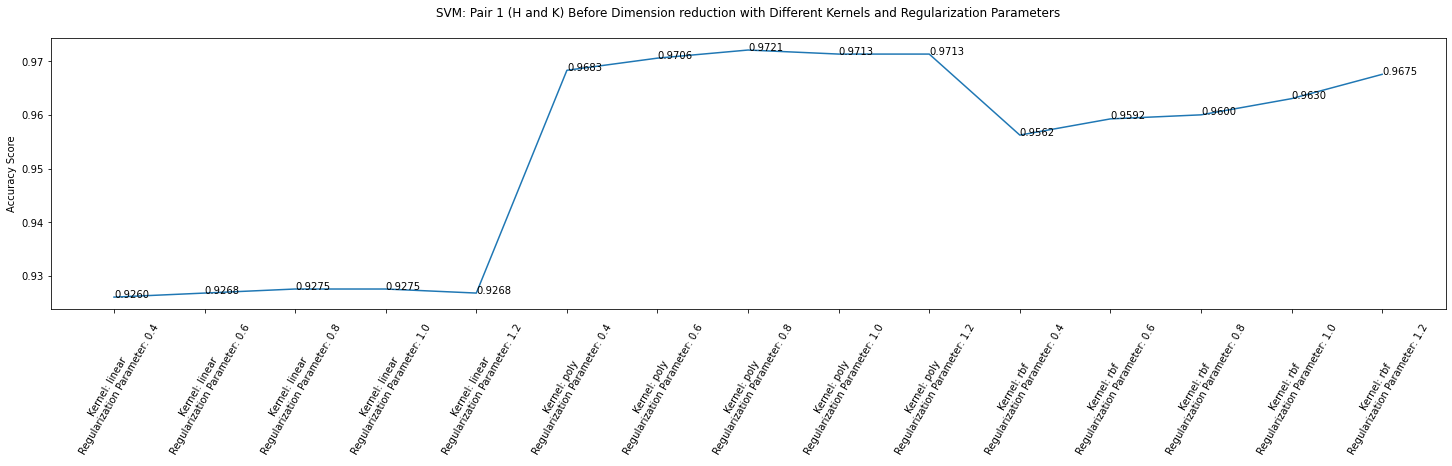

Mean Accuracy:  0.953
Best Accuracy:  0.9721
Running Time:  2.5155
--------------------------------------------------------------------------------------


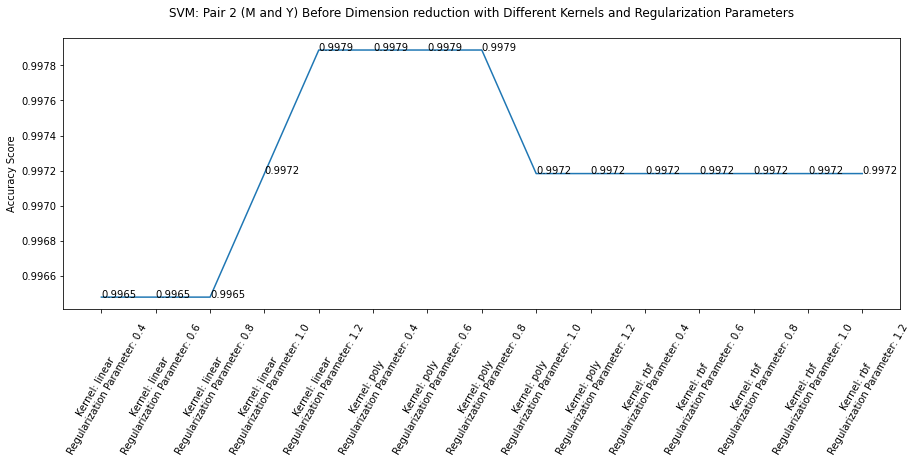

Mean Accuracy:  0.9972
Best Accuracy:  0.9979
Running Time:  0.8041
--------------------------------------------------------------------------------------


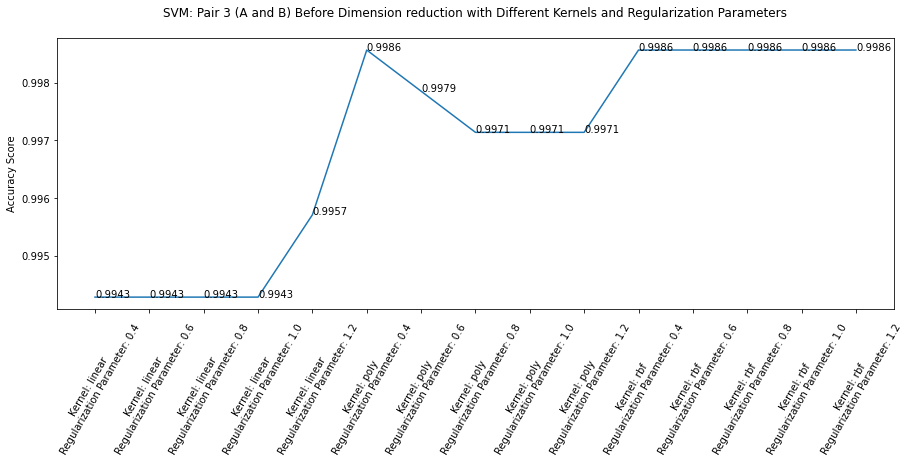

Mean Accuracy:  0.9969
Best Accuracy:  0.9986
Running Time:  0.9303
--------------------------------------------------------------------------------------


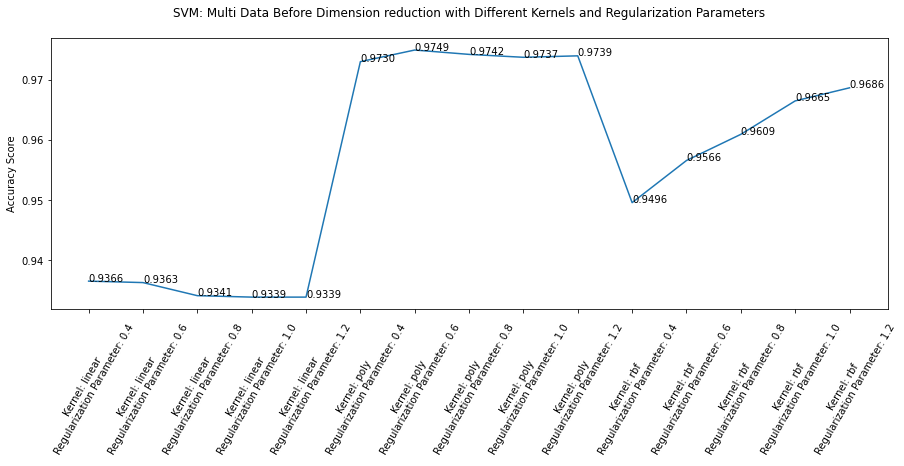

Mean Accuracy:  0.9564
Best Accuracy:  0.9749
Running Time:  16.9737
--------------------------------------------------------------------------------------


In [19]:
svm1_models = []
svm1_models = svm(svm1_models)
plot('SVM: Pair 1 (H and K) Before Dimension reduction with Different Kernels and Regularization Parameters\n', svm1_models, p1_x_train, p1_y_train, p1_x_test, p1_y_test)

plot('SVM: Pair 2 (M and Y) Before Dimension reduction with Different Kernels and Regularization Parameters\n', svm1_models, p2_x_train, p2_y_train, p2_x_test, p2_y_test)

plot('SVM: Pair 3 (A and B) Before Dimension reduction with Different Kernels and Regularization Parameters\n', svm1_models, p3_x_train, p3_y_train, p3_x_test, p3_y_test)

plot('SVM: Multi Data Before Dimension reduction with Different Kernels and Regularization Parameters\n', svm1_models, multi_x_train, multi_y_train, multi_x_test, multi_y_test)

## Artificial Neural Network

In [20]:
hidden_layer_sizes = [100, 200, 300, 400,500]
activations = ['logistic', 'tanh', 'relu']

def ann(models):
    for a in activations:
        for h in hidden_layer_sizes:
            models.append(('Activiation Functions: {} \n Hidden Layer Sizes: {}'.format(a, h), MLPClassifier(activation = a, hidden_layer_sizes = h, random_state = 13)))
    return models

/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/h

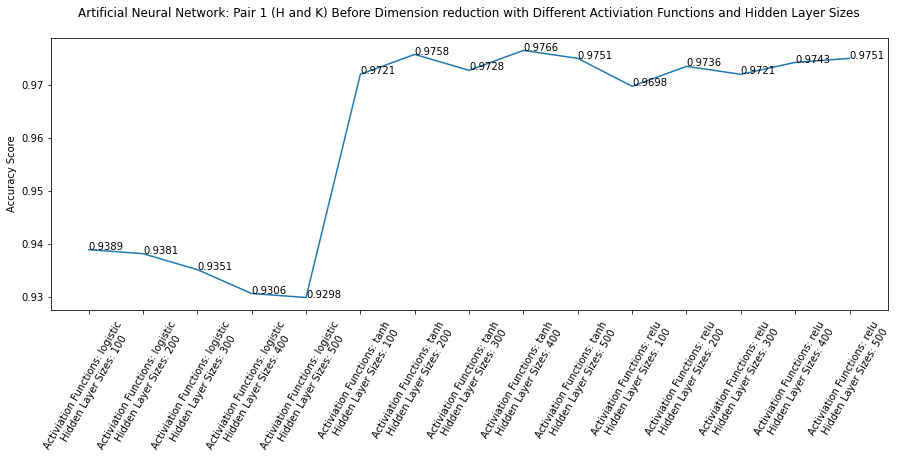

Mean Accuracy:  0.9607
Best Accuracy:  0.9766
Running Time:  195.1661
--------------------------------------------------------------------------------------


/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/h

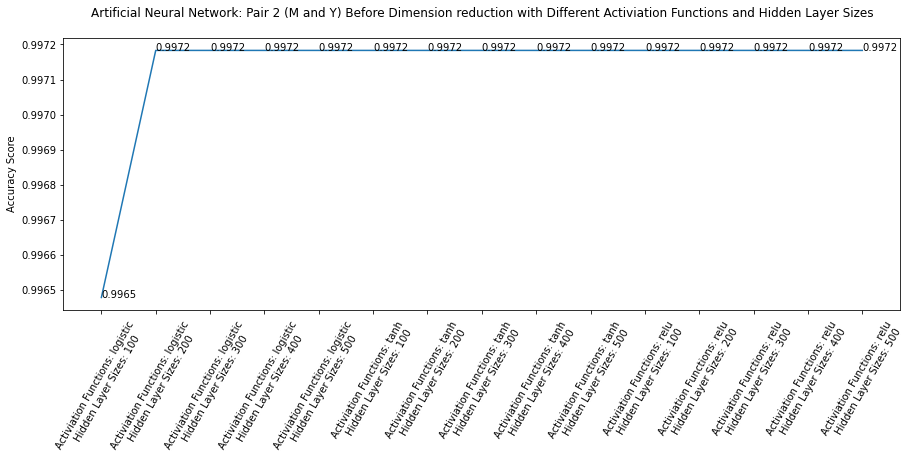

Mean Accuracy:  0.9971
Best Accuracy:  0.9972
Running Time:  196.0437
--------------------------------------------------------------------------------------


/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/h

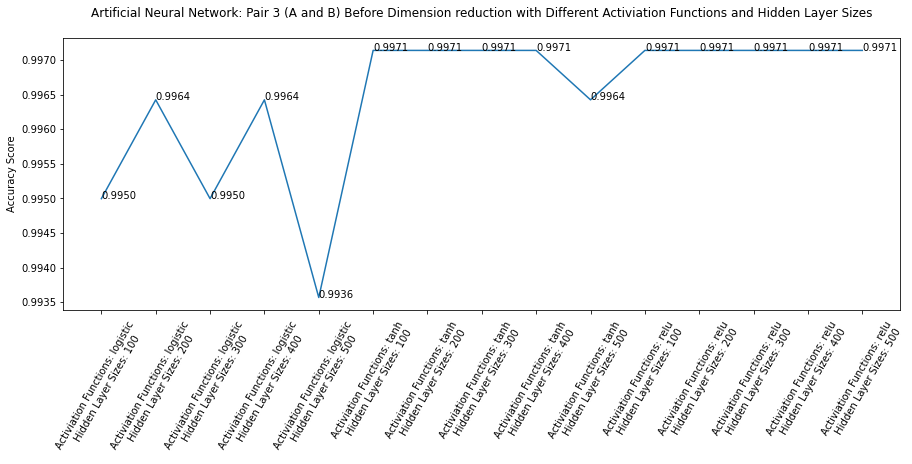

Mean Accuracy:  0.9965
Best Accuracy:  0.9971
Running Time:  210.4061
--------------------------------------------------------------------------------------


In [21]:
ann1_models = []
ann1_models = ann(ann1_models)
plot('Artificial Neural Network: Pair 1 (H and K) Before Dimension reduction with Different Activiation Functions and Hidden Layer Sizes\n', ann1_models, p1_x_train, p1_y_train, p1_x_test, p1_y_test)

plot('Artificial Neural Network: Pair 2 (M and Y) Before Dimension reduction with Different Activiation Functions and Hidden Layer Sizes\n', ann1_models, p2_x_train, p2_y_train, p2_x_test, p2_y_test)

plot('Artificial Neural Network: Pair 3 (A and B) Before Dimension reduction with Different Activiation Functions and Hidden Layer Sizes\n', ann1_models, p3_x_train, p3_y_train, p3_x_test, p3_y_test)

## Extra Trees

In [22]:
n_estimators = [20, 40, 60, 80, 100]
criterions = ['gini', 'entropy']

def et(models):
    for c in criterions:
        for e in n_estimators:
            models.append(('Measure Functions: {} \n Number of Trees: {}'.format(c, e), ExtraTreesClassifier(criterion = c, n_estimators = e, random_state = 13)))
    return models

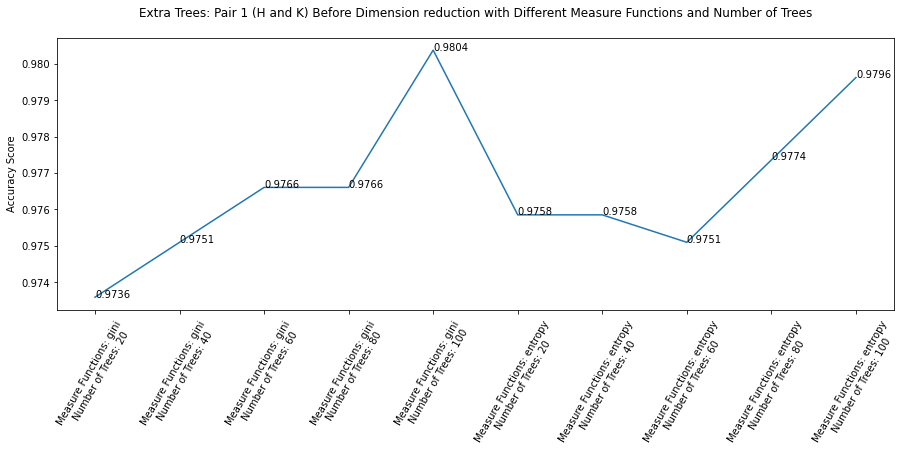

Mean Accuracy:  0.9766
Best Accuracy:  0.9804
Running Time:  3.4654
--------------------------------------------------------------------------------------


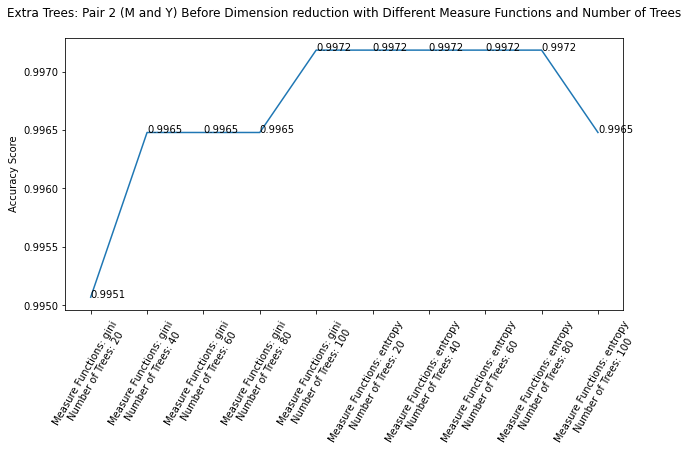

Mean Accuracy:  0.9967
Best Accuracy:  0.9972
Running Time:  2.8379
--------------------------------------------------------------------------------------


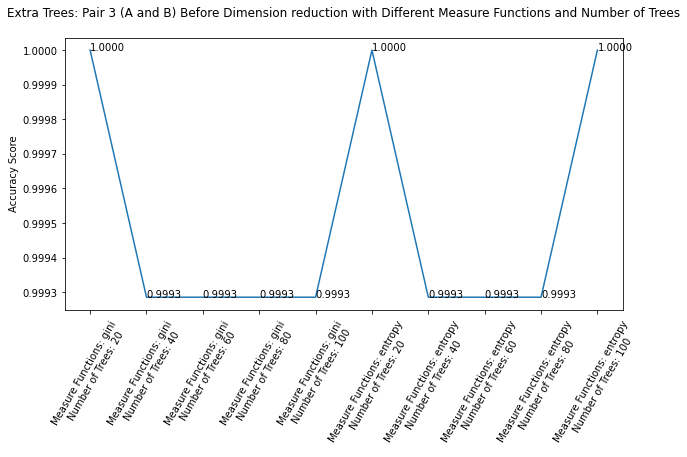

Mean Accuracy:  0.9995
Best Accuracy:  1.0
Running Time:  2.9602
--------------------------------------------------------------------------------------


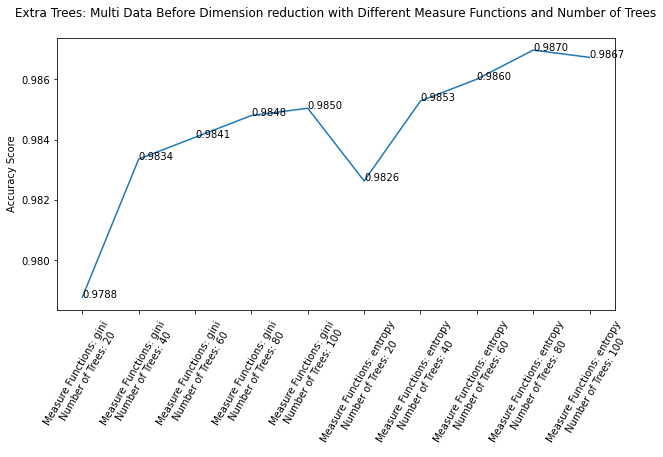

Mean Accuracy:  0.9844
Best Accuracy:  0.987
Running Time:  8.2623
--------------------------------------------------------------------------------------


In [23]:
et1_models = []
et1_models = et(et1_models)
plot('Extra Trees: Pair 1 (H and K) Before Dimension reduction with Different Measure Functions and Number of Trees\n', et1_models, p1_x_train, p1_y_train, p1_x_test, p1_y_test)

plot('Extra Trees: Pair 2 (M and Y) Before Dimension reduction with Different Measure Functions and Number of Trees\n', et1_models, p2_x_train, p2_y_train, p2_x_test, p2_y_test)

plot('Extra Trees: Pair 3 (A and B) Before Dimension reduction with Different Measure Functions and Number of Trees\n', et1_models, p3_x_train, p3_y_train, p3_x_test, p3_y_test)

plot('Extra Trees: Multi Data Before Dimension reduction with Different Measure Functions and Number of Trees\n', et1_models, multi_x_train, multi_y_train, multi_x_test, multi_y_test)

##  Ada Boost

In [24]:
learning_rates = [0.2, 0.4, 0.8, 1.0, 1.2]
n_estimators = [20, 40, 60, 80, 100]

def ada_boost(models):
    for l in learning_rates:
        for e in n_estimators:
            models.append(('Learning Rate: {} \n Number of Trees: {}'.format(l, e), AdaBoostClassifier(n_estimators = e, learning_rate = l, random_state = 13)))
    return models

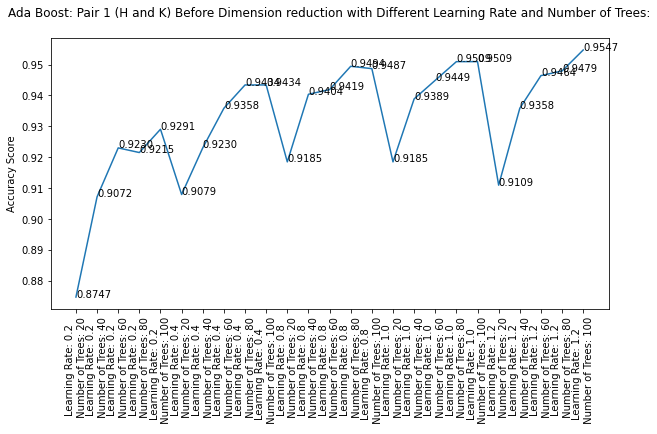

Mean Accuracy:  0.9323
Best Accuracy:  0.9547
Running Time:  15.5958
--------------------------------------------------------------------------------------


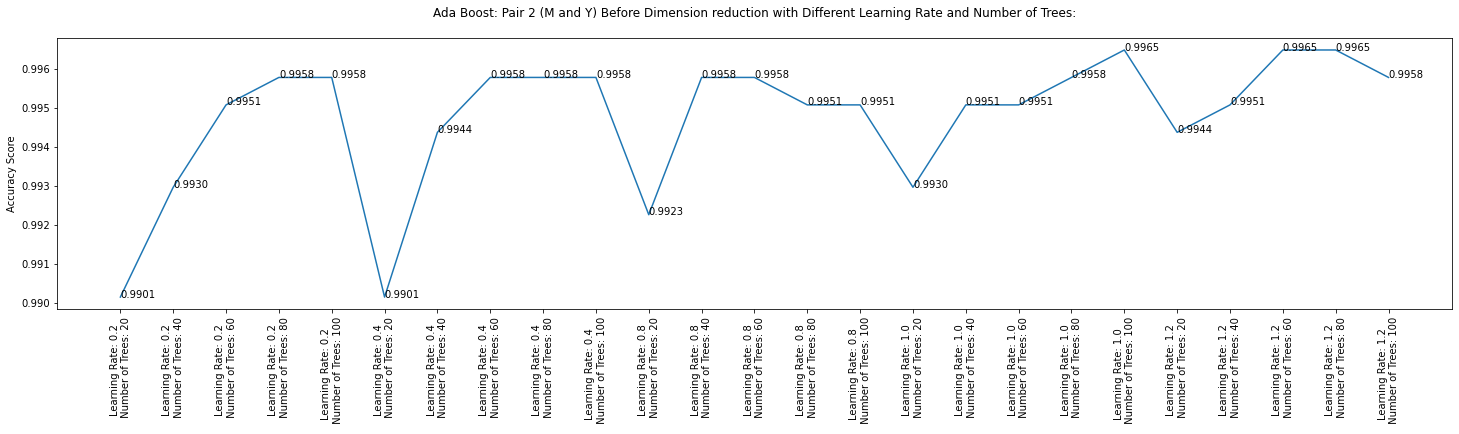

Mean Accuracy:  0.9948
Best Accuracy:  0.9965
Running Time:  16.5295
--------------------------------------------------------------------------------------


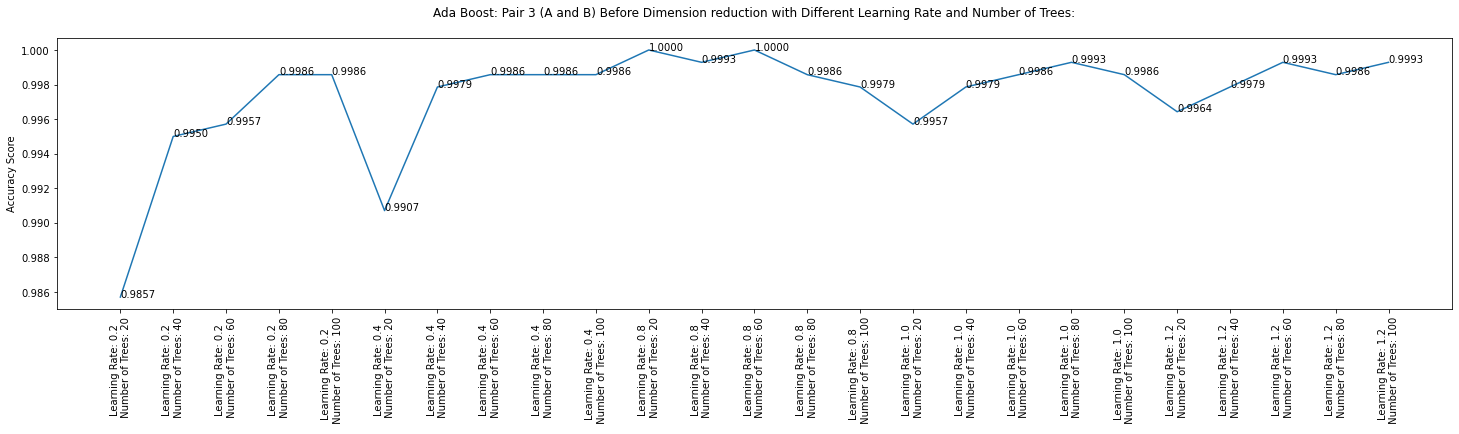

Mean Accuracy:  0.9974
Best Accuracy:  1.0
Running Time:  16.3481
--------------------------------------------------------------------------------------


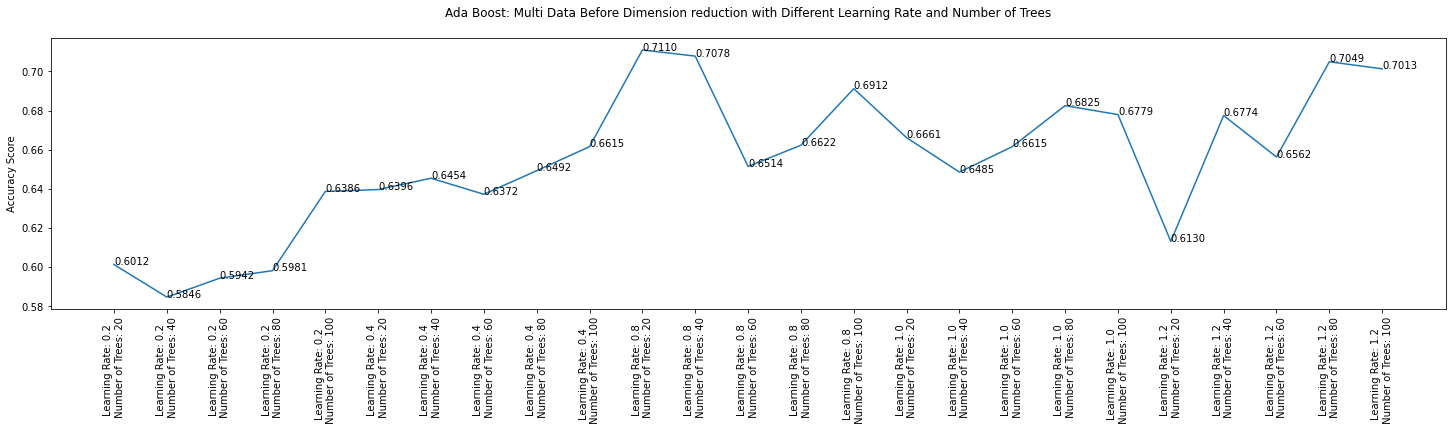

Mean Accuracy:  0.6545
Best Accuracy:  0.711
Running Time:  42.804
--------------------------------------------------------------------------------------


In [25]:
ab1_models = []
ab1_models = ada_boost(ab1_models)
plot('Ada Boost: Pair 1 (H and K) Before Dimension reduction with Different Learning Rate and Number of Trees:\n', ab1_models, p1_x_train, p1_y_train, p1_x_test, p1_y_test)

plot('Ada Boost: Pair 2 (M and Y) Before Dimension reduction with Different Learning Rate and Number of Trees:\n', ab1_models, p2_x_train, p2_y_train, p2_x_test, p2_y_test)

plot('Ada Boost: Pair 3 (A and B) Before Dimension reduction with Different Learning Rate and Number of Trees:\n', ab1_models, p3_x_train, p3_y_train, p3_x_test, p3_y_test)

plot('Ada Boost: Multi Data Before Dimension reduction with Different Learning Rate and Number of Trees\n', ab1_models, multi_x_train, multi_y_train, multi_x_test, multi_y_test)

# Dimension reduction

## Simple Quality Filtering - Low variance

In [26]:
def SQF_lowVar(data):
    constant_filter = VarianceThreshold(threshold = 2)
    constant_filter.fit(data)
    new_data = constant_filter.transform(data)
    return new_data

print(p1_x.shape)
new_data = SQF_lowVar(p1_x)
print(new_data.shape)

(1473, 16)
(1473, 14)


## Embedded Methods -  Univariate feature selection¶

In [27]:
def EM_UniFeatureSelection(x, y):
    X_newTrain = SelectKBest(chi2, k=4).fit_transform(x, y)
    return X_newTrain

## Feature Extraction - PCA

In [28]:
new_data_features = 4

def FE_PCA(data):
    pca = PCA(n_components = 4)
    new_data = pca.fit_transform(data)
    return new_data

In [29]:
new_p1_x_train = FE_PCA(EM_UniFeatureSelection(SQF_lowVar(p1_x_train), p1_y_train))
new_p2_x_train = FE_PCA(EM_UniFeatureSelection(SQF_lowVar(p2_x_train), p2_y_train))
new_p3_x_train = FE_PCA(EM_UniFeatureSelection(SQF_lowVar(p3_x_train), p3_y_train))
new_multi_x_train = FE_PCA(EM_UniFeatureSelection(SQF_lowVar(multi_x_train), multi_y_train))
new_p1_x_test = FE_PCA(EM_UniFeatureSelection(SQF_lowVar(p1_x_test), p1_y_test))
new_p2_x_test = FE_PCA(EM_UniFeatureSelection(SQF_lowVar(p2_x_test), p2_y_test))
new_p3_x_test = FE_PCA(EM_UniFeatureSelection(SQF_lowVar(p3_x_test), p3_y_test))
new_multi_x_test = FE_PCA(EM_UniFeatureSelection(SQF_lowVar(multi_x_test), multi_y_test))

print("Original Data Features: ", p1_x_train.shape[1], ", Reduced Data Features: ", new_p1_x_train.shape[1])

Original Data Features:  16 , Reduced Data Features:  4


## K-Nearest Neighbors

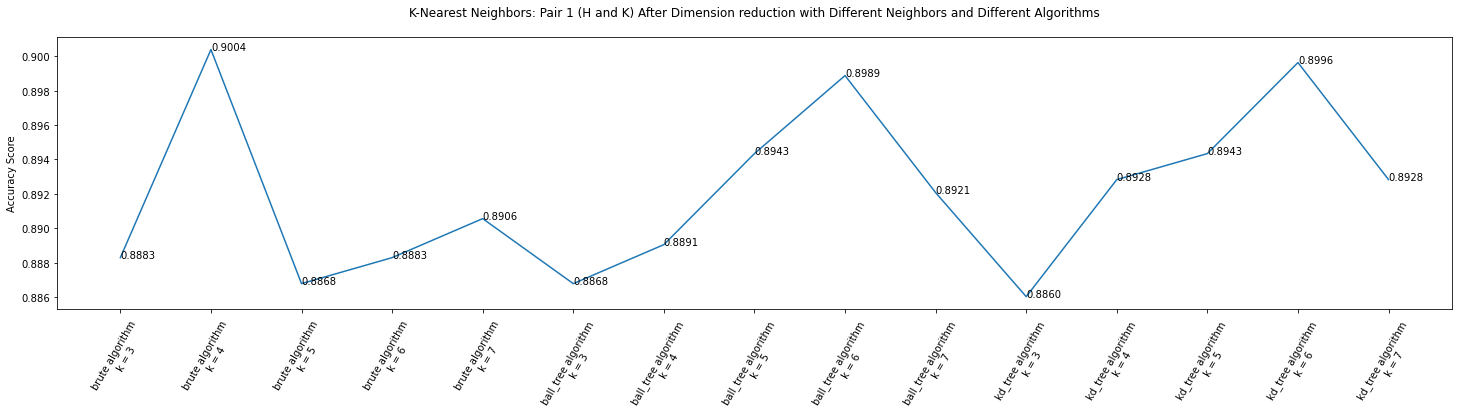

Mean Accuracy:  0.8921
Best Accuracy:  0.9004
Running Time:  0.7735
--------------------------------------------------------------------------------------


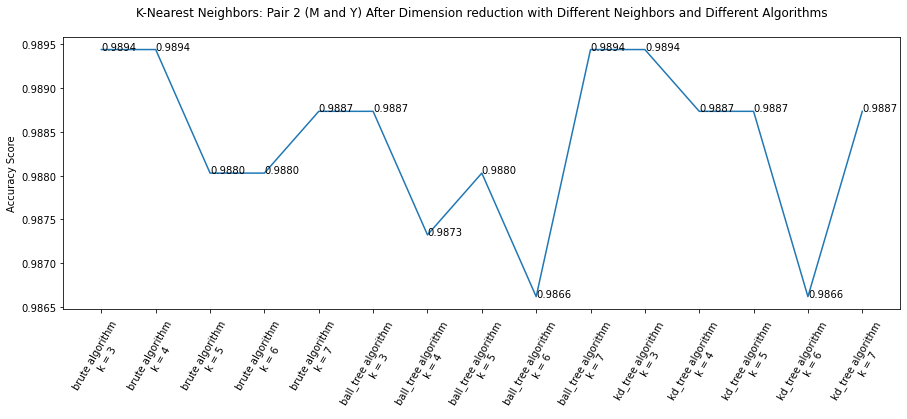

Mean Accuracy:  0.9884
Best Accuracy:  0.9894
Running Time:  0.7534
--------------------------------------------------------------------------------------


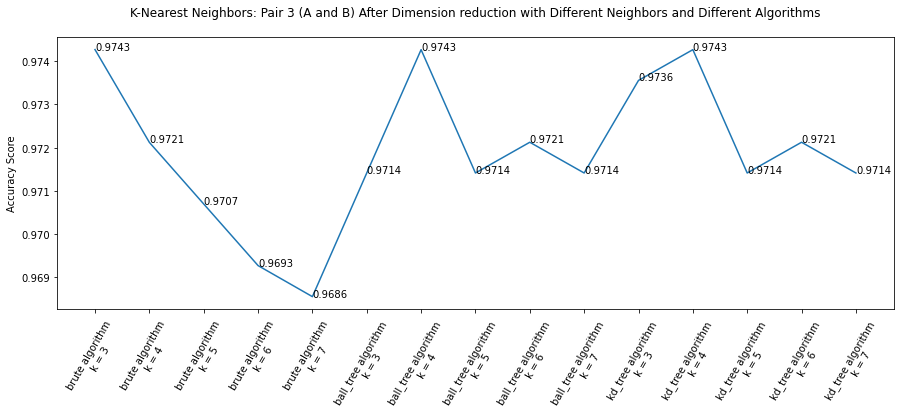

Mean Accuracy:  0.9719
Best Accuracy:  0.9743
Running Time:  0.719
--------------------------------------------------------------------------------------


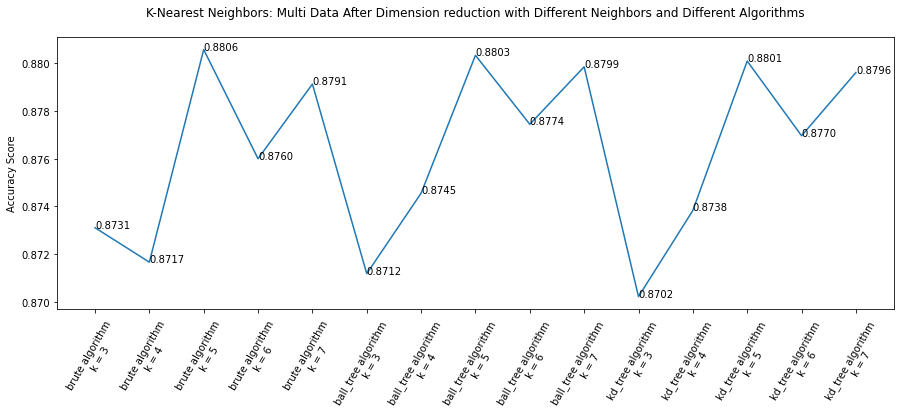

Mean Accuracy:  0.8763
Best Accuracy:  0.8806
Running Time:  2.7899
--------------------------------------------------------------------------------------


In [30]:
knn2_models = []
knn2_models = knn(knn2_models)
plot('K-Nearest Neighbors: Pair 1 (H and K) After Dimension reduction with Different Neighbors and Different Algorithms\n', knn2_models, new_p1_x_train, p1_y_train, new_p1_x_test, p1_y_test)

plot('K-Nearest Neighbors: Pair 2 (M and Y) After Dimension reduction with Different Neighbors and Different Algorithms\n', knn2_models, new_p2_x_train, p2_y_train, new_p2_x_test, p2_y_test)

plot('K-Nearest Neighbors: Pair 3 (A and B) After Dimension reduction with Different Neighbors and Different Algorithms\n', knn2_models, new_p3_x_train, p3_y_train, new_p3_x_test, p3_y_test)

plot('K-Nearest Neighbors: Multi Data After Dimension reduction with Different Neighbors and Different Algorithms\n', knn2_models, new_multi_x_train, multi_y_train, new_multi_x_test, multi_y_test)

## Decision Tree

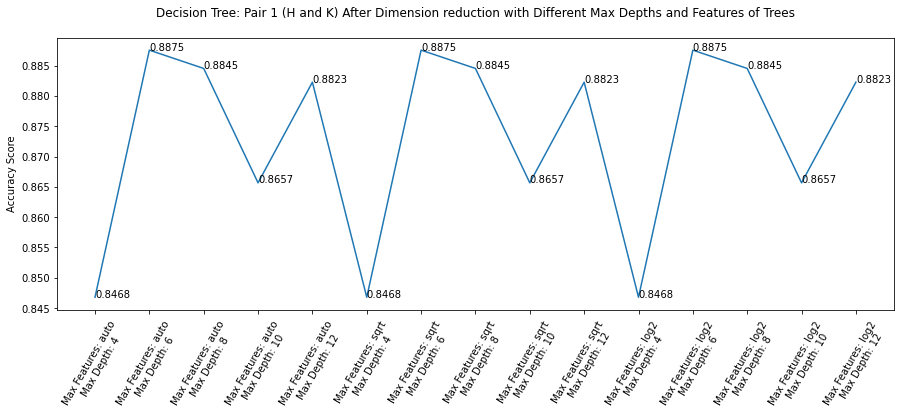

Mean Accuracy:  0.8734
Best Accuracy:  0.8875
Running Time:  0.2109
--------------------------------------------------------------------------------------


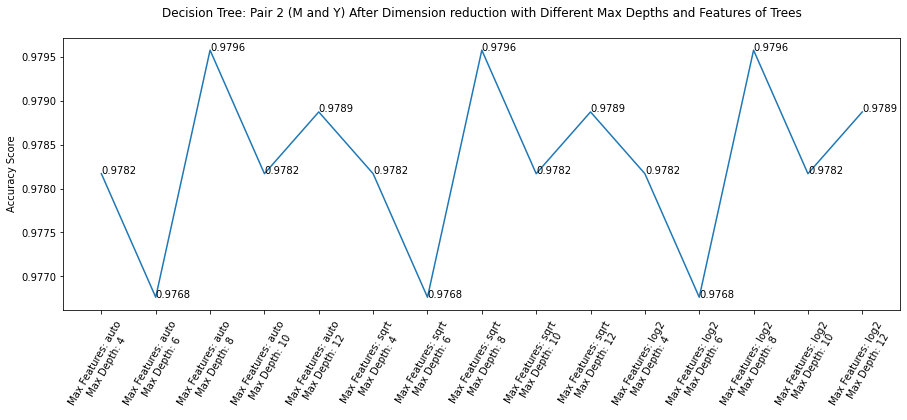

Mean Accuracy:  0.9783
Best Accuracy:  0.9796
Running Time:  0.2053
--------------------------------------------------------------------------------------


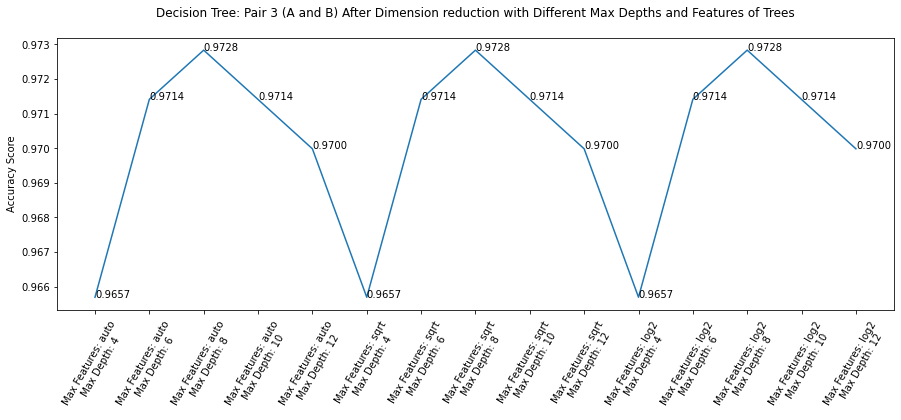

Mean Accuracy:  0.9703
Best Accuracy:  0.9728
Running Time:  0.1942
--------------------------------------------------------------------------------------


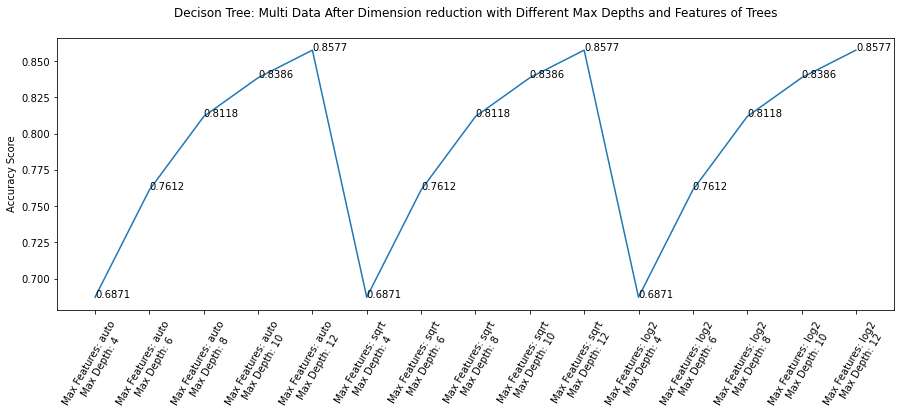

Mean Accuracy:  0.7913
Best Accuracy:  0.8577
Running Time:  0.5374
--------------------------------------------------------------------------------------


In [31]:
dt2_models = []
dt2_models = decison_tree(dt2_models)
plot('Decision Tree: Pair 1 (H and K) After Dimension reduction with Different Max Depths and Features of Trees\n', dt2_models, new_p1_x_train, p1_y_train, new_p1_x_test, p1_y_test)

plot('Decision Tree: Pair 2 (M and Y) After Dimension reduction with Different Max Depths and Features of Trees\n', dt2_models, new_p2_x_train, p2_y_train, new_p2_x_test, p2_y_test)

plot('Decision Tree: Pair 3 (A and B) After Dimension reduction with Different Max Depths and Features of Trees\n', dt2_models, new_p3_x_train, p3_y_train, new_p3_x_test, p3_y_test)

plot('Decison Tree: Multi Data After Dimension reduction with Different Max Depths and Features of Trees\n', dt2_models, new_multi_x_train, multi_y_train, new_multi_x_test, multi_y_test)

## Random Forest

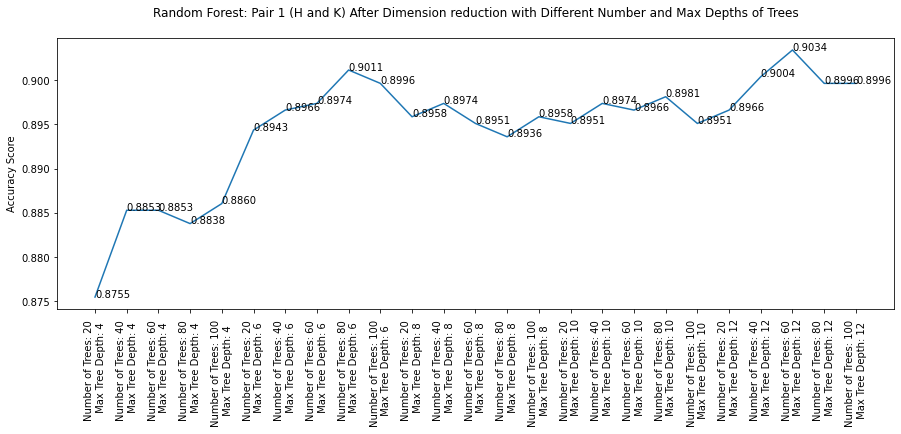

Mean Accuracy:  0.8946
Best Accuracy:  0.9034
Running Time:  10.6177
--------------------------------------------------------------------------------------


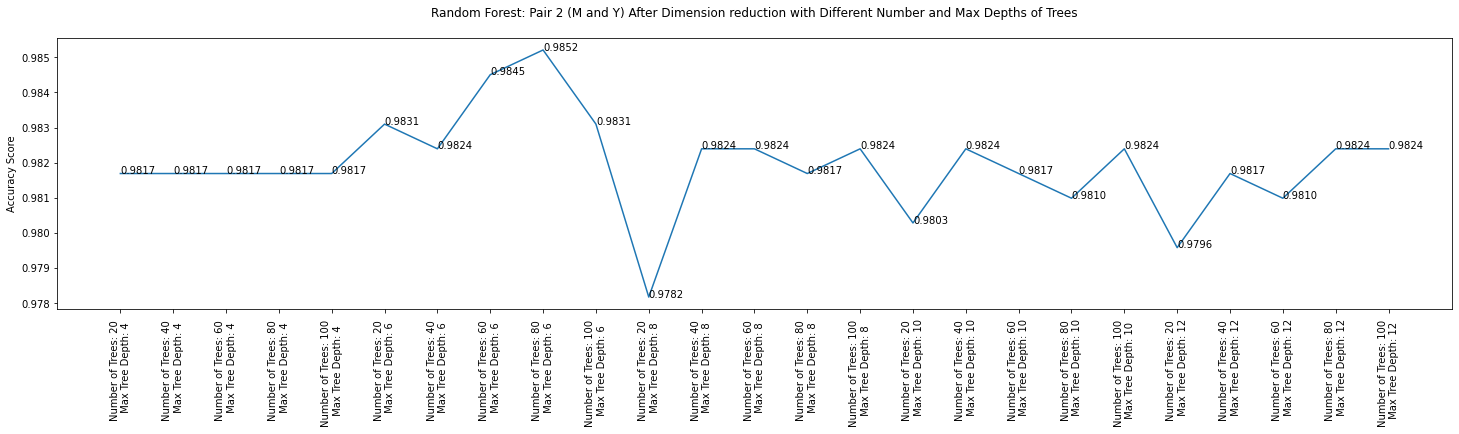

Mean Accuracy:  0.9819
Best Accuracy:  0.9852
Running Time:  9.9746
--------------------------------------------------------------------------------------


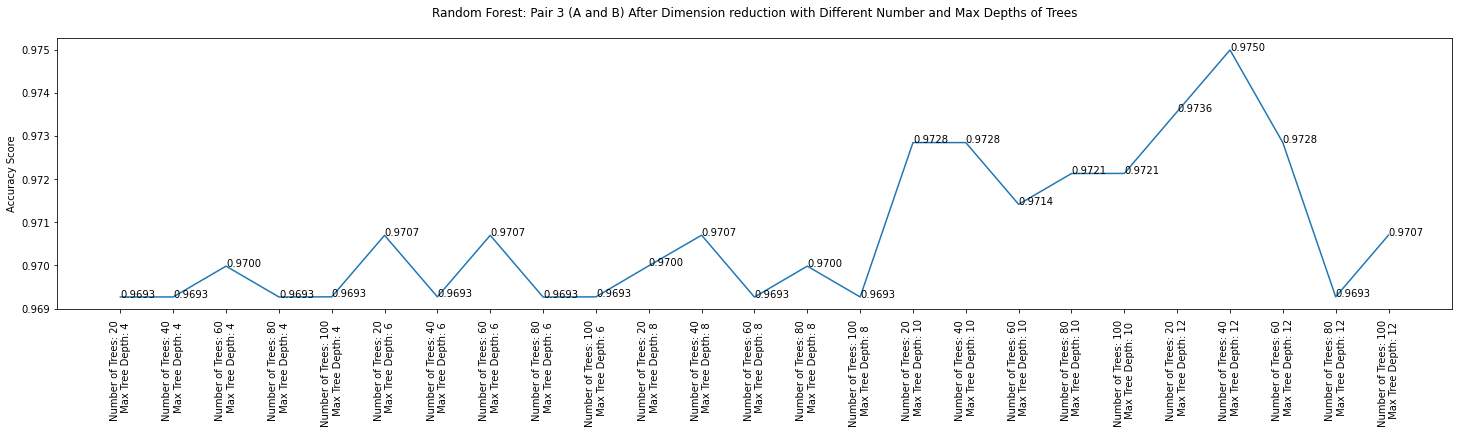

Mean Accuracy:  0.9707
Best Accuracy:  0.975
Running Time:  9.6331
--------------------------------------------------------------------------------------


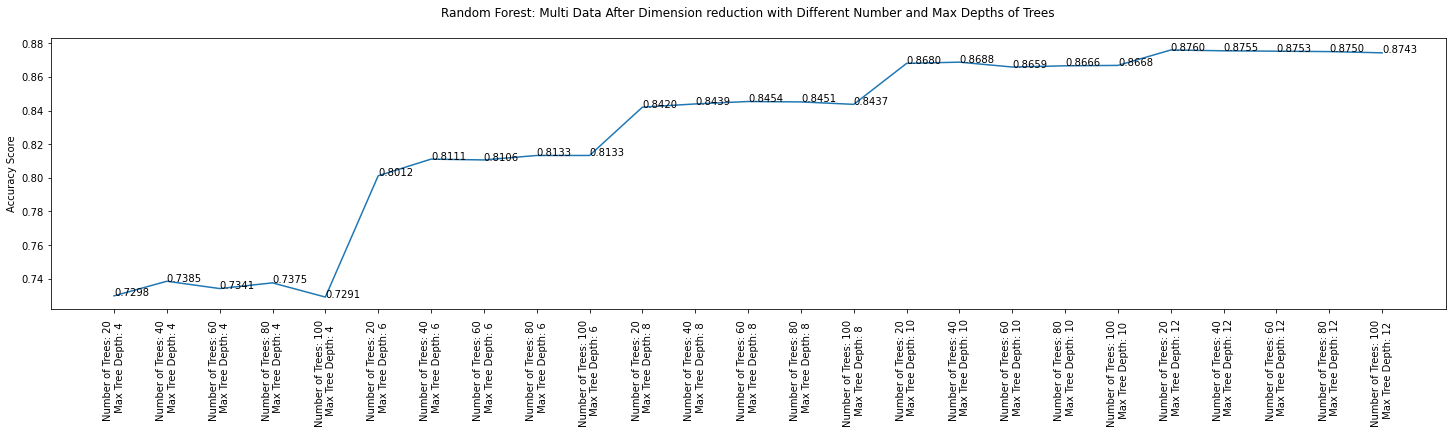

Mean Accuracy:  0.826
Best Accuracy:  0.876
Running Time:  23.8312
--------------------------------------------------------------------------------------


In [32]:
rf2_models = []
rf2_models = random_forest(rf2_models)
plot('Random Forest: Pair 1 (H and K) After Dimension reduction with Different Number and Max Depths of Trees\n', rf2_models, new_p1_x_train, p1_y_train, new_p1_x_test, p1_y_test)

plot('Random Forest: Pair 2 (M and Y) After Dimension reduction with Different Number and Max Depths of Trees\n', rf2_models, new_p2_x_train, p2_y_train, new_p2_x_test, p2_y_test)

plot('Random Forest: Pair 3 (A and B) After Dimension reduction with Different Number and Max Depths of Trees\n', rf2_models, new_p3_x_train, p3_y_train, new_p3_x_test, p3_y_test)

plot('Random Forest: Multi Data After Dimension reduction with Different Number and Max Depths of Trees\n', rf2_models, new_multi_x_train, multi_y_train, new_multi_x_test, multi_y_test)

## SVM

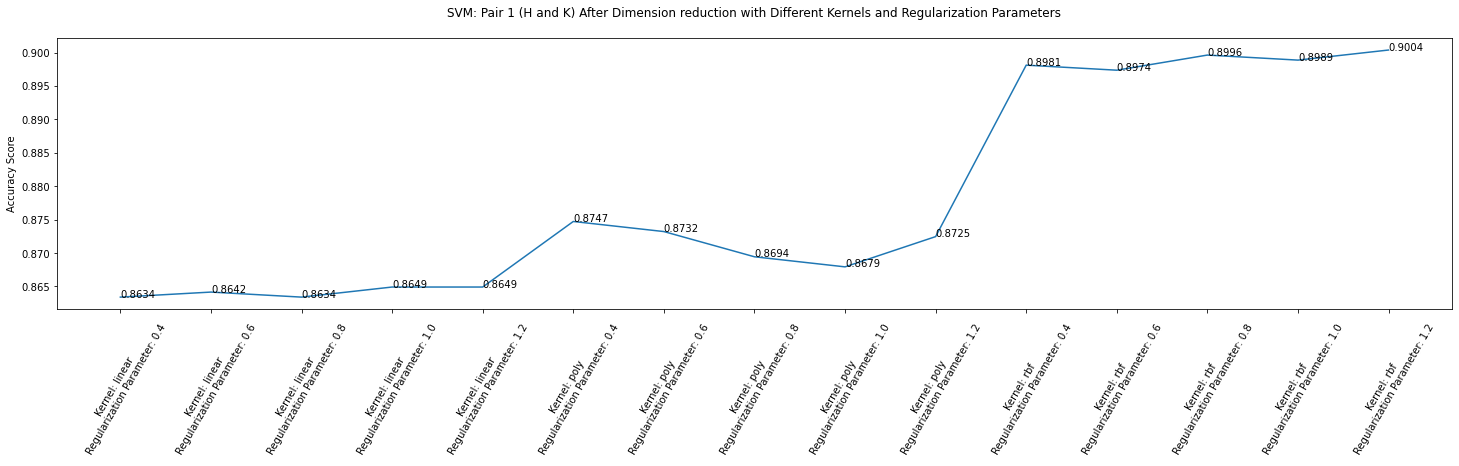

Mean Accuracy:  0.8782
Best Accuracy:  0.9004
Running Time:  2.4699
--------------------------------------------------------------------------------------


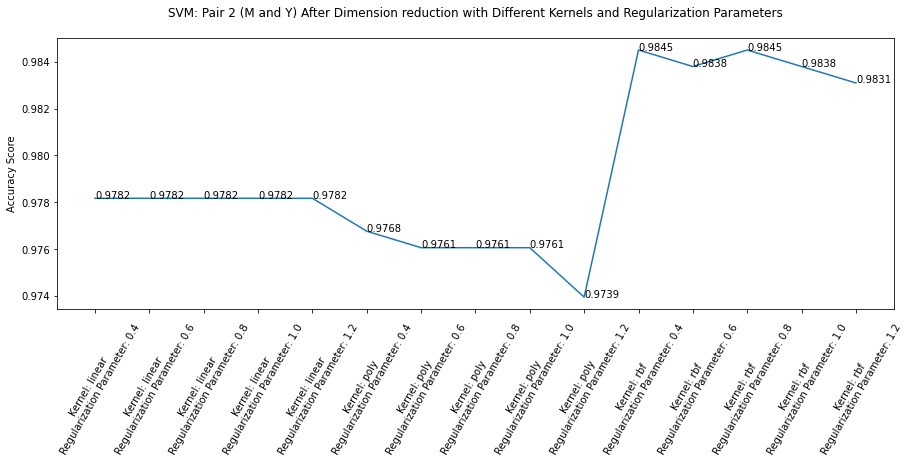

Mean Accuracy:  0.9793
Best Accuracy:  0.9845
Running Time:  0.7863
--------------------------------------------------------------------------------------


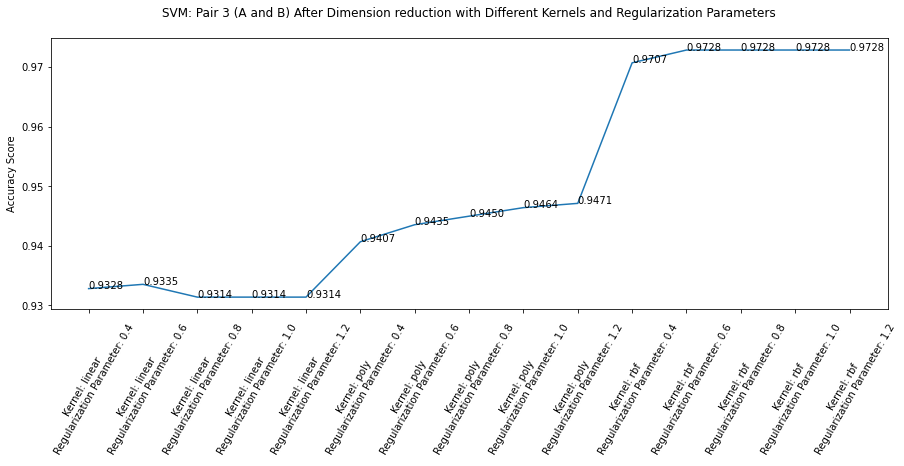

Mean Accuracy:  0.9497
Best Accuracy:  0.9728
Running Time:  1.2552
--------------------------------------------------------------------------------------


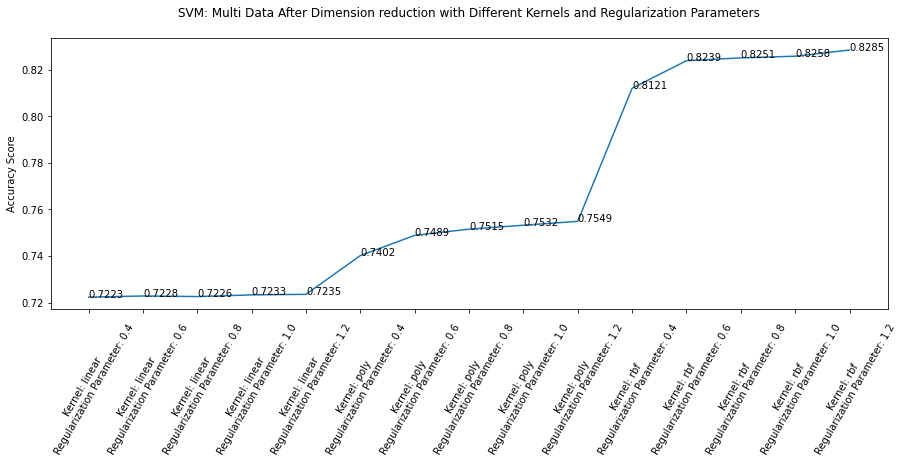

Mean Accuracy:  0.7652
Best Accuracy:  0.8285
Running Time:  26.1485
--------------------------------------------------------------------------------------


In [33]:
svm2_models = []
svm2_models = svm(svm2_models)
plot('SVM: Pair 1 (H and K) After Dimension reduction with Different Kernels and Regularization Parameters\n', svm2_models, new_p1_x_train, p1_y_train, new_p1_x_test, p1_y_test)

plot('SVM: Pair 2 (M and Y) After Dimension reduction with Different Kernels and Regularization Parameters\n', svm2_models, new_p2_x_train, p2_y_train, new_p2_x_test, p2_y_test)

plot('SVM: Pair 3 (A and B) After Dimension reduction with Different Kernels and Regularization Parameters\n', svm2_models, new_p3_x_train, p3_y_train, new_p3_x_test, p3_y_test)

plot('SVM: Multi Data After Dimension reduction with Different Kernels and Regularization Parameters\n', svm2_models, new_multi_x_train, multi_y_train, new_multi_x_test, multi_y_test)

## Artificial Neural Network

/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/h

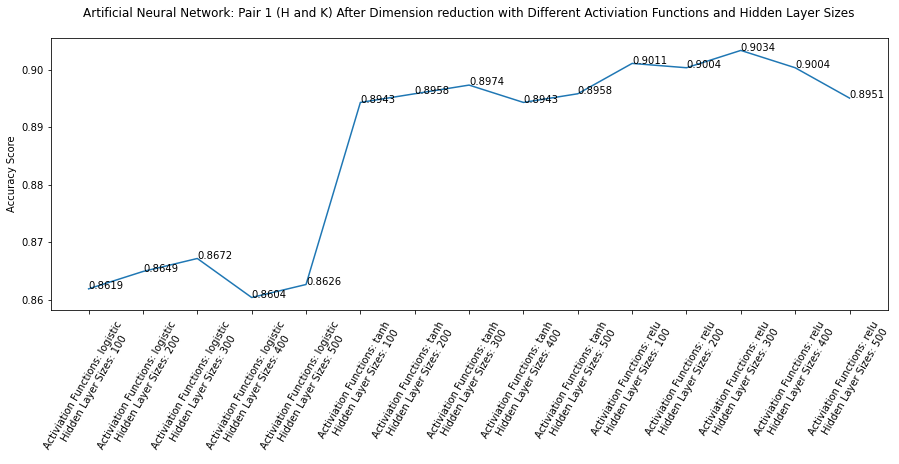

Mean Accuracy:  0.8863
Best Accuracy:  0.9034
Running Time:  174.353
--------------------------------------------------------------------------------------


/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/h

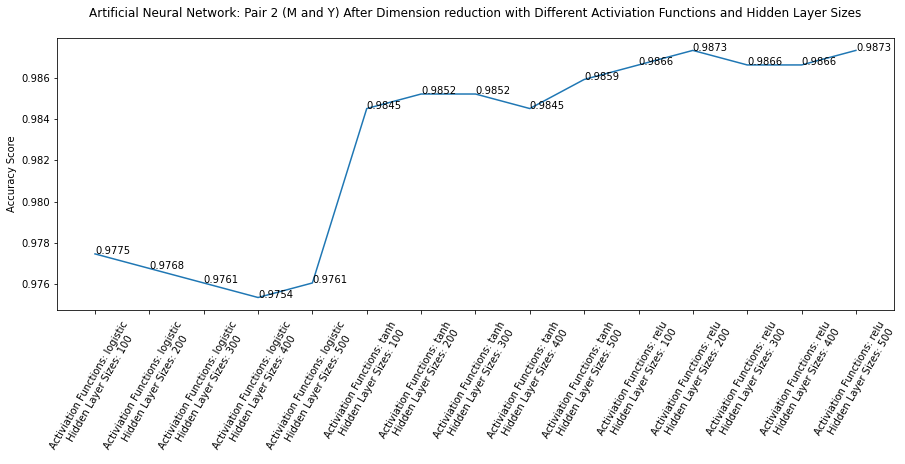

Mean Accuracy:  0.9828
Best Accuracy:  0.9873
Running Time:  195.1248
--------------------------------------------------------------------------------------


/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hanqichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/h

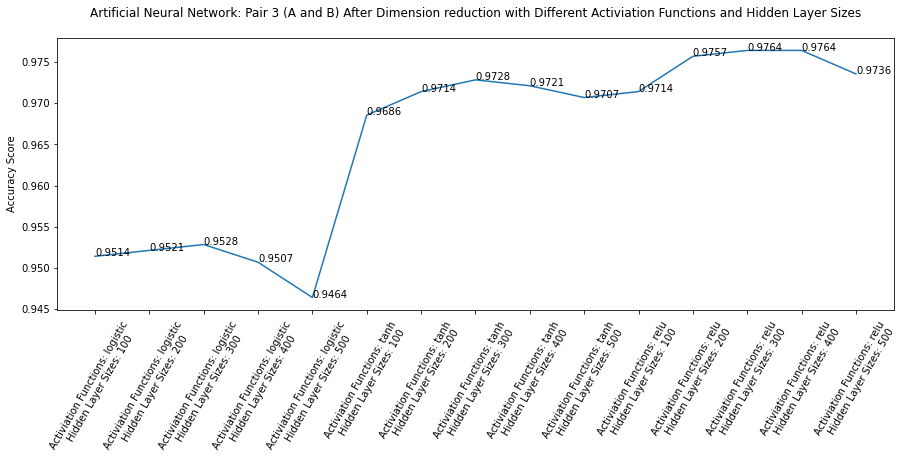

Mean Accuracy:  0.9655
Best Accuracy:  0.9764
Running Time:  180.8732
--------------------------------------------------------------------------------------


In [34]:
ann2_models = []
ann2_models = ann(ann2_models)
plot('Artificial Neural Network: Pair 1 (H and K) After Dimension reduction with Different Activiation Functions and Hidden Layer Sizes\n', ann2_models, new_p1_x_train, p1_y_train, new_p1_x_test, p1_y_test)

plot('Artificial Neural Network: Pair 2 (M and Y) After Dimension reduction with Different Activiation Functions and Hidden Layer Sizes\n', ann2_models, new_p2_x_train, p2_y_train, new_p2_x_test, p2_y_test)

plot('Artificial Neural Network: Pair 3 (A and B) After Dimension reduction with Different Activiation Functions and Hidden Layer Sizes\n', ann2_models, new_p3_x_train, p3_y_train, new_p3_x_test, p3_y_test)

## Extra Trees

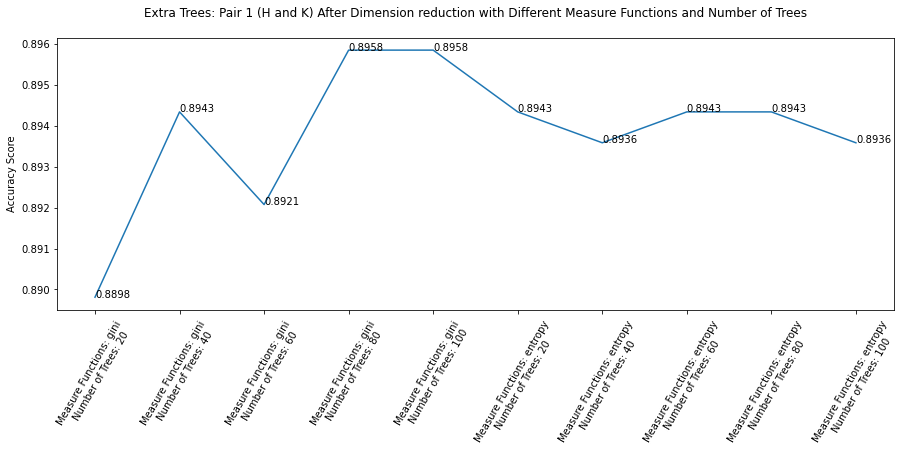

Mean Accuracy:  0.8938
Best Accuracy:  0.8958
Running Time:  2.9743
--------------------------------------------------------------------------------------


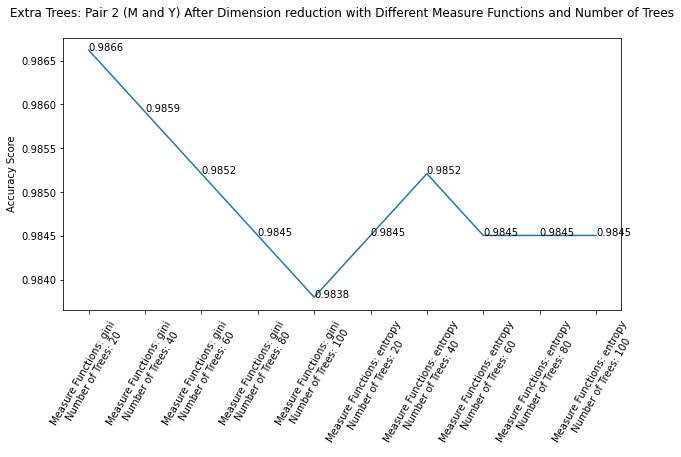

Mean Accuracy:  0.9849
Best Accuracy:  0.9866
Running Time:  2.5978
--------------------------------------------------------------------------------------


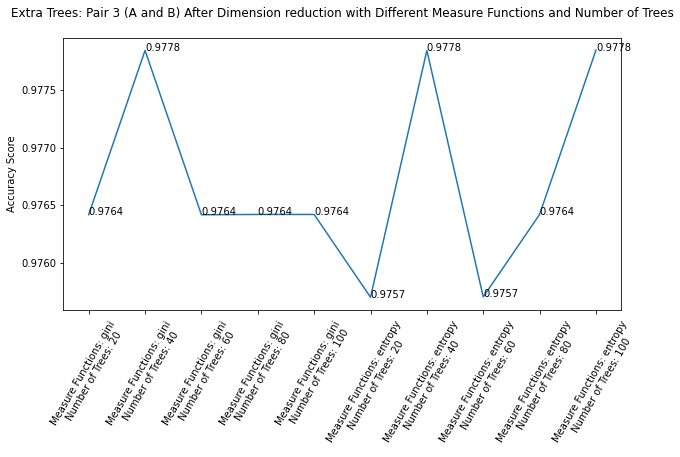

Mean Accuracy:  0.9767
Best Accuracy:  0.9778
Running Time:  2.7239
--------------------------------------------------------------------------------------


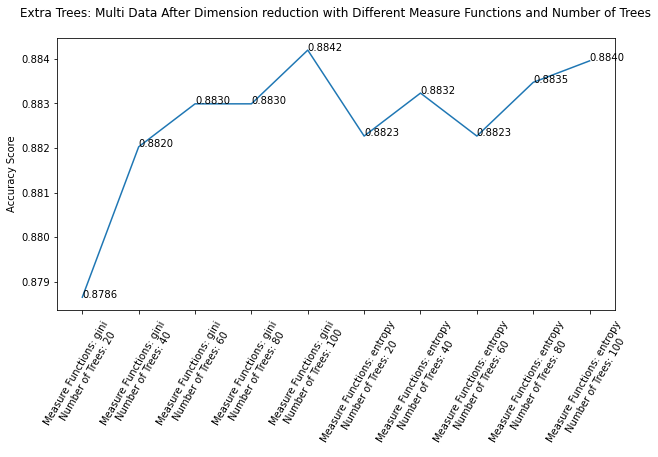

Mean Accuracy:  0.8826
Best Accuracy:  0.8842
Running Time:  6.746
--------------------------------------------------------------------------------------


In [35]:
et2_models = []
et2_models = et(et2_models)
plot('Extra Trees: Pair 1 (H and K) After Dimension reduction with Different Measure Functions and Number of Trees\n', et2_models, new_p1_x_train, p1_y_train, new_p1_x_test, p1_y_test)

plot('Extra Trees: Pair 2 (M and Y) After Dimension reduction with Different Measure Functions and Number of Trees\n', et2_models, new_p2_x_train, p2_y_train, new_p2_x_test, p2_y_test)

plot('Extra Trees: Pair 3 (A and B) After Dimension reduction with Different Measure Functions and Number of Trees\n', et2_models, new_p3_x_train, p3_y_train, new_p3_x_test, p3_y_test)

plot('Extra Trees: Multi Data After Dimension reduction with Different Measure Functions and Number of Trees\n', et2_models, new_multi_x_train, multi_y_train, new_multi_x_test, multi_y_test)

##  Ada Boost

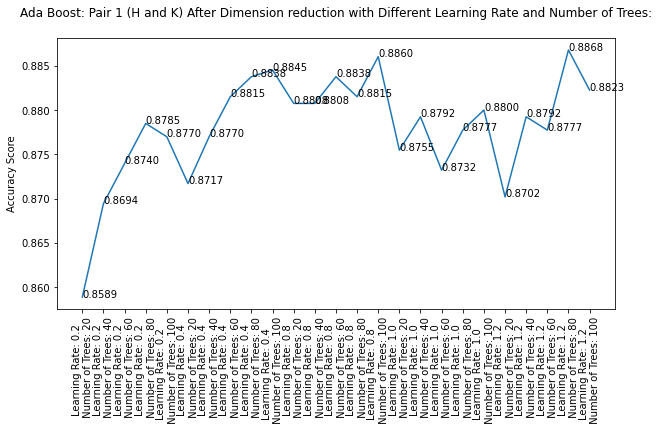

Mean Accuracy:  0.878
Best Accuracy:  0.8868
Running Time:  14.8702
--------------------------------------------------------------------------------------


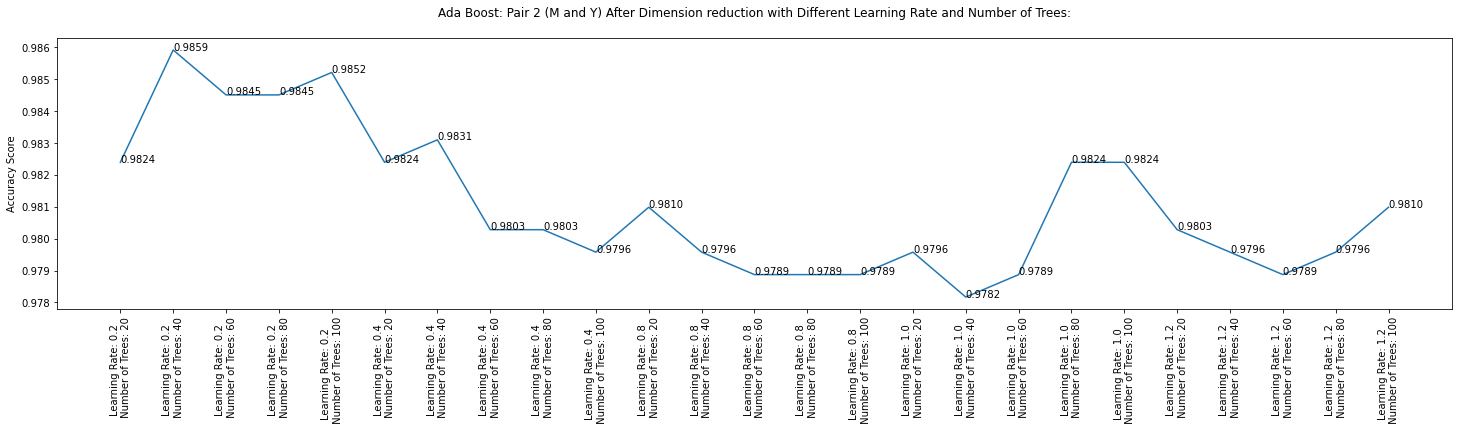

Mean Accuracy:  0.981
Best Accuracy:  0.9859
Running Time:  14.6039
--------------------------------------------------------------------------------------


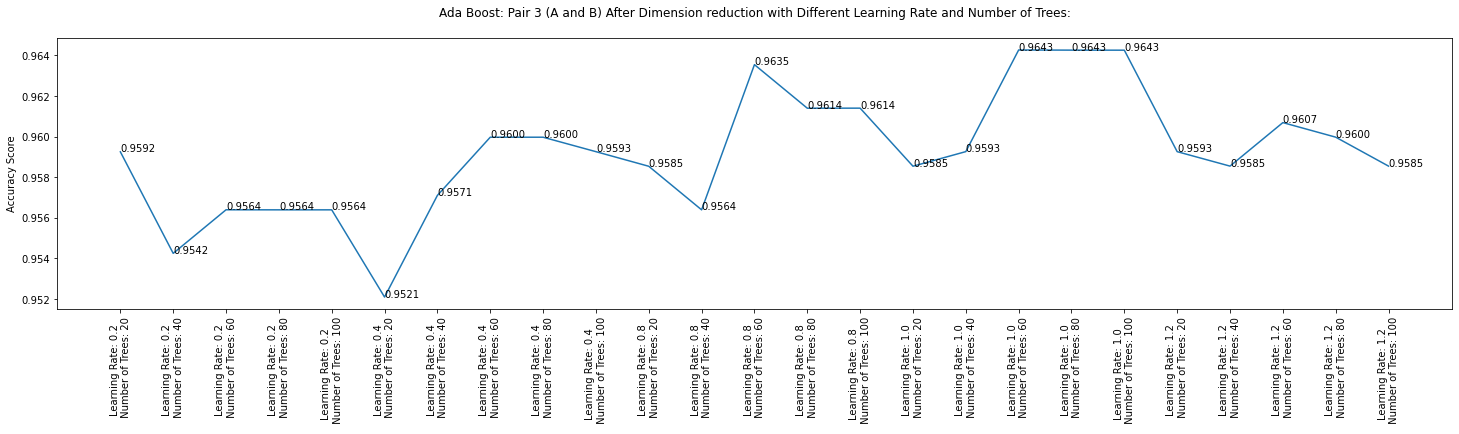

Mean Accuracy:  0.9592
Best Accuracy:  0.9643
Running Time:  14.0689
--------------------------------------------------------------------------------------


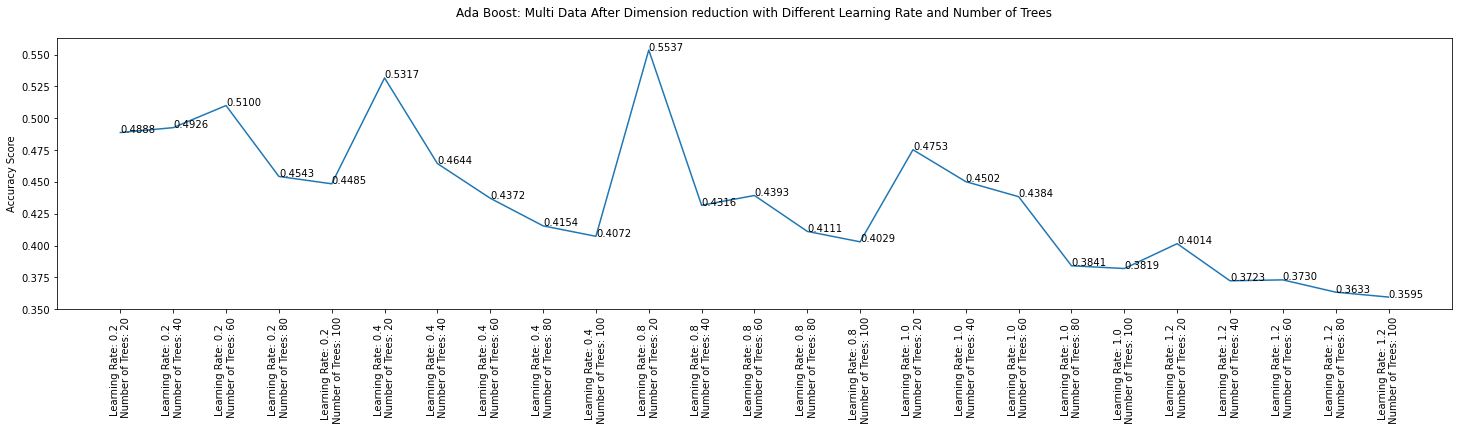

Mean Accuracy:  0.4355
Best Accuracy:  0.5537
Running Time:  41.2981
--------------------------------------------------------------------------------------


In [36]:
ab2_models = []
ab2_models = ada_boost(ab2_models)
plot('Ada Boost: Pair 1 (H and K) After Dimension reduction with Different Learning Rate and Number of Trees:\n', ab2_models, new_p1_x_train, p1_y_train, new_p1_x_test, p1_y_test)

plot('Ada Boost: Pair 2 (M and Y) After Dimension reduction with Different Learning Rate and Number of Trees:\n', ab2_models, new_p2_x_train, p2_y_train, new_p2_x_test, p2_y_test)

plot('Ada Boost: Pair 3 (A and B) After Dimension reduction with Different Learning Rate and Number of Trees:\n', ab2_models, new_p3_x_train, p3_y_train, new_p3_x_test, p3_y_test)

plot('Ada Boost: Multi Data After Dimension reduction with Different Learning Rate and Number of Trees\n', ab2_models, new_multi_x_train, multi_y_train, new_multi_x_test, multi_y_test)